# MLND Capstone: Reinforcement Learner Trader
####  Q-learner with Dyna that sells and buys stock to maximize earnings
####  Erik Flogvall 9 December 2017

### Imports libraries and functions

In [1]:
#Imports Python libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Imports prepare_data function that I have made for this project
from prepdata import prepare_data

In [3]:
#Imports the QTrader class that I have created
from q_trader import QTrader

### Loads and Preprocesses the data

Reads and preprocesses the stock data from the CSV-files. Splits the data into a "training only" set for simulating practising on historical data and a "training & evaluation" set for simulating implementing the Q-learner.

In [4]:
# The ratio of trading days used simulating practising on historical data
split_ratio = 0.7

# Window size for making features with rollings stats of the closing price
window_size = 20

# Subfolder where the CSV-files are stored
csv_dir = 'individual_stocks_5yr'

# Loads the CSV files and preprocesses them by splitting the data and computing new features from the closing price
data, trading_days, dates, stocks = prepare_data(csv_dir, split_ratio, window_size)

### Defining state settings

The state is set by a dictionary containing feature names with how many discrete steps each should use.

In [5]:
# Creates seven different states settings

state_settings = [
   {'Daily_return': 3, 'Rolling_mean': 3, 'Rolling_std': 3, 'Daily_return_-1': 3, 'Daily_return_-2': 3},
   {'Daily_return': 2, 'Rolling_mean': 2, 'Rolling_std': 2, 'Daily_return_-1': 2, 'Daily_return_-2': 2},
   {'Daily_return': 2},
   {'Daily_return': 3},
   {'Daily_return': 5},
   {'Daily_return': 10},
   {'Daily_return': 20},
   {'Daily_return': 50},
   {'Daily_return': 2, 'Daily_return_-1': 2, 'Daily_return_-2': 2},
   {'Daily_return': 3, 'Daily_return_-1': 3, 'Daily_return_-2': 3},
   {'Daily_return': 5, 'Daily_return_-1': 5, 'Daily_return_-2': 5},
   {'Rolling_mean': 2, 'Rolling_std': 2},
   {'Rolling_mean': 3, 'Rolling_std': 3},
   {'Rolling_mean': 5, 'Rolling_std': 5},
   {'Rolling_mean': 10, 'Rolling_std': 10},
   {'Daily_return': 2,'Rolling_mean': 2, 'Rolling_std': 2},
   {'Daily_return': 3,'Rolling_mean': 3, 'Rolling_std': 3},
   {'Daily_return': 5,'Rolling_mean': 5, 'Rolling_std': 5}]



### Initializing Q-learners for each method of making states

In [6]:
qt_input = {'data': data, 'dates':dates, 'stocks':stocks, 'trading_days': trading_days, 'state_settings': None}

qt = []
for state_setting in state_settings:
    print state_setting
    qt_input['state_settings'] = state_setting
    qt.append(QTrader(qt_input, epsilon = 1.0, alpha = 0.05,epsilon_decay = 1.5e-5, gamma = 0.95))

{'Daily_return': 3, 'Daily_return_-2': 3, 'Daily_return_-1': 3, 'Rolling_mean': 3, 'Rolling_std': 3}
{'Daily_return': 2, 'Daily_return_-2': 2, 'Daily_return_-1': 2, 'Rolling_mean': 2, 'Rolling_std': 2}
{'Daily_return': 2}
{'Daily_return': 3}
{'Daily_return': 5}
{'Daily_return': 10}
{'Daily_return': 20}
{'Daily_return': 50}
{'Daily_return': 2, 'Daily_return_-2': 2, 'Daily_return_-1': 2}
{'Daily_return': 3, 'Daily_return_-2': 3, 'Daily_return_-1': 3}
{'Daily_return': 5, 'Daily_return_-2': 5, 'Daily_return_-1': 5}
{'Rolling_mean': 2, 'Rolling_std': 2}
{'Rolling_mean': 3, 'Rolling_std': 3}
{'Rolling_mean': 5, 'Rolling_std': 5}
{'Rolling_mean': 10, 'Rolling_std': 10}
{'Daily_return': 2, 'Rolling_mean': 2, 'Rolling_std': 2}
{'Daily_return': 3, 'Rolling_mean': 3, 'Rolling_std': 3}
{'Daily_return': 5, 'Rolling_mean': 5, 'Rolling_std': 5}


### Trains the Q-learners on historical data

In [7]:
for n in range(0,len(qt),1):
    print "training ", state_settings[n]
    qt[n].run('train_only')

training  {'Daily_return': 3, 'Daily_return_-2': 3, 'Daily_return_-1': 3, 'Rolling_mean': 3, 'Rolling_std': 3}
Finished
training  {'Daily_return': 2, 'Daily_return_-2': 2, 'Daily_return_-1': 2, 'Rolling_mean': 2, 'Rolling_std': 2}
Finished
training  {'Daily_return': 2}
Finished
training  {'Daily_return': 3}
Finished
training  {'Daily_return': 5}
Finished
training  {'Daily_return': 10}
Finished
training  {'Daily_return': 20}
Finished
training  {'Daily_return': 50}
Finished
training  {'Daily_return': 2, 'Daily_return_-2': 2, 'Daily_return_-1': 2}
Finished
training  {'Daily_return': 3, 'Daily_return_-2': 3, 'Daily_return_-1': 3}
Finished
training  {'Daily_return': 5, 'Daily_return_-2': 5, 'Daily_return_-1': 5}
Finished
training  {'Rolling_mean': 2, 'Rolling_std': 2}
Finished
training  {'Rolling_mean': 3, 'Rolling_std': 3}
Finished
training  {'Rolling_mean': 5, 'Rolling_std': 5}
Finished
training  {'Rolling_mean': 10, 'Rolling_std': 10}
Finished
training  {'Daily_return': 2, 'Rolling_mean'

### Performance on historical data

In [8]:
# Checks the performance agianst the benchmark for each state settting
benchmarks = []

for n in range(0,len(qt),1):
    benchmark = qt[n].check_benchmark()
    benchmarks.append(benchmark)
    print state_settings[n]
    print benchmark
    print "\n"

{'Daily_return': 3, 'Daily_return_-2': 3, 'Daily_return_-1': 3, 'Rolling_mean': 3, 'Rolling_std': 3}
{'Benchmark': 0.12787467683312881, 'Q-learning': 0.76880457134126379}


{'Daily_return': 2, 'Daily_return_-2': 2, 'Daily_return_-1': 2, 'Rolling_mean': 2, 'Rolling_std': 2}
{'Benchmark': 0.12787467683312881, 'Q-learning': 1.1133470526824363}


{'Daily_return': 2}
{'Benchmark': 0.12787467683312881, 'Q-learning': 1.4710642708098818}


{'Daily_return': 3}
{'Benchmark': 0.12787467683312881, 'Q-learning': 1.5093079815549471}


{'Daily_return': 5}
{'Benchmark': 0.12787467683312881, 'Q-learning': 1.4006651458372399}


{'Daily_return': 10}
{'Benchmark': 0.12787467683312881, 'Q-learning': 1.3144558475679284}


{'Daily_return': 20}
{'Benchmark': 0.12787467683312881, 'Q-learning': 1.1051836095366498}


{'Daily_return': 50}
{'Benchmark': 0.12787467683312881, 'Q-learning': 0.79293536644478269}


{'Daily_return': 2, 'Daily_return_-2': 2, 'Daily_return_-1': 2}
{'Benchmark': 0.12787467683312881, 'Q-lea

#### Runs the five best methods again

In [9]:
top5_states = [2,3,11,12,15]

top5_state_settings = [state_settings[i] for i in top5_states]

qt_input = {'data': data, 'dates':dates, 'stocks':stocks, 'trading_days': trading_days, 'state_settings': None}

returns = []
for state_setting in top5_state_settings:
    state_returns = []
    qt = []
    print "--------------------------\n",state_setting
    for k in range(3):
        print "-------\nRun", k+1
        print "initializing"
        qt_input['state_settings'] = state_setting
        qt.append(QTrader(qt_input, epsilon = 1.0, alpha = 0.05,epsilon_decay = 1.5e-5, gamma = 0.95))
        print "training"
        qt[k].run('train_only')
        print "evaluating results"
        benchmark = qt[k].check_benchmark()
        print benchmark['Q-learning']
        state_returns.append(benchmark['Q-learning'])
    mean_return = np.mean(state_returns)
    print "Mean return", mean_return
    returns.append(mean_return)
    
        
        



--------------------------
{'Daily_return': 2}
-------
Run 1
initializing
training
Finished
evaluating results
1.65652906469
-------
Run 2
initializing
training
Finished
evaluating results
1.54093725233
-------
Run 3
initializing
training
Finished
evaluating results
1.4822941628
Mean return 1.55992015994
--------------------------
{'Daily_return': 3}
-------
Run 1
initializing
training
Finished
evaluating results
1.49127851538
-------
Run 2
initializing
training
Finished
evaluating results
1.39698747688
-------
Run 3
initializing
training
Finished
evaluating results
1.51684067526
Mean return 1.46836888917
--------------------------
{'Rolling_mean': 2, 'Rolling_std': 2}
-------
Run 1
initializing
training
Finished
evaluating results
1.62812548256
-------
Run 2
initializing
training
Finished
evaluating results
1.73897287817
-------
Run 3
initializing
training
Finished
evaluating results
1.67797260591
Mean return 1.68169032221
--------------------------
{'Rolling_mean': 3, 'Rolling_std': 

# Results for evaluation set

In [11]:
# Runs five seprate Q-learners with the final model.

qt_input = {'data': data, 'dates':dates, 'stocks':stocks, 'trading_days': trading_days, 'state_settings': {'Rolling_mean': 2, 'Rolling_std': 2}}

evaluation_return = []
benchmarks = []

qt = []
for n in range(0,5,1):
    qt.append(QTrader(qt_input, epsilon = 1.0, alpha = 0.05,epsilon_decay = 1.5e-5, gamma = 0.95))
    qt[n].run('train_only')
    qt[n].run('train_eval')
    evaluation_return.append(qt[n].total_balance())
    benchmarks.append(qt[n].check_benchmark())

Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished
Finished


## Return for the five Q-learners with the final model

In [12]:
for ev in evaluation_return:
    print ev

22584.49
27229.49
24845.51
24753.04
25462.52


## Benchmark for the five Q-learners with the final mode

In [13]:
for benchmark in benchmarks:
    print benchmark

{'Benchmark': 0.15415329758612203, 'Q-learning': 0.65347044189668735}
{'Benchmark': 0.15415329758612203, 'Q-learning': 0.78755784786992611}
{'Benchmark': 0.15415329758612203, 'Q-learning': 0.74667021686743706}
{'Benchmark': 0.15415329758612203, 'Q-learning': 0.74855156447267834}
{'Benchmark': 0.15415329758612203, 'Q-learning': 0.74412112953917875}


## Making plot to compare performance

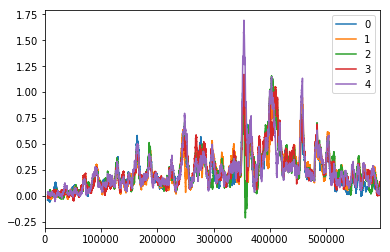

595365


In [14]:
d = {}
for n in range(0,5,1):
    d[n] = qt[n].log['reward']
    

    
df = pd.DataFrame(d)

df = df.rolling(5000).mean()

df.plot()
plt.show()

print len(qt[0].log['t'])